In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random
from tensorflow_addons.losses import pinball_loss
from sklearn.metrics import mean_pinball_loss
import math

In [2]:
#Pinball loss
def pinball_loss(x, tau = 0.5):
    return np.maximum(tau*x, (tau-1)*x)

In [3]:
#Smooth exp quantile loss

def exp_smooth_pinball_loss(delta_y, tau = 0.5, alpha = 0.001):
    #Implement smooth loss
    pinball = tau * delta_y + alpha * tf.math.softplus(-delta_y/alpha)
    return pinball.numpy()

In [4]:
#Smooth sqrt quantile loss

def sqrt_smooth_pinball_loss(delta_y, tau = 0.5,alpha = 0.001):

    #Implement smooth loss
    pinball = (delta_y*(2*tau - 1) + tf.math.sqrt(tf.math.square(delta_y) + alpha))/2
    return pinball.numpy()

In [5]:
#Huber quantile loss

def huber_pinball_loss2(error, tau = 0.5, alpha = 0.001):
    tau = tf.expand_dims(tf.cast(tau, error.dtype), 0)
    one = tf.cast(1, tau.dtype)
    half = tf.convert_to_tensor(0.5, dtype=error.dtype)
    abs_error = tf.abs(error)
    huber = tf.where(abs_error <= alpha, half * tf.square(error)/alpha,
                         abs_error - half * alpha)
    
    
    #Implement smooth loss
    pinball = tf.where(error >=0, tau * huber, (tau - one) * huber)
    return pinball.numpy()

In [6]:
def huber_pinball_loss(error, tau = 0.5, alpha = 0.001):
    huber = np.where(np.abs(error) <= alpha, np.square(error)/(2*alpha), np.abs(error) - alpha/2)
    pinball = np.where(error >= 0, tau*huber, (1-tau)*huber)
    return pinball

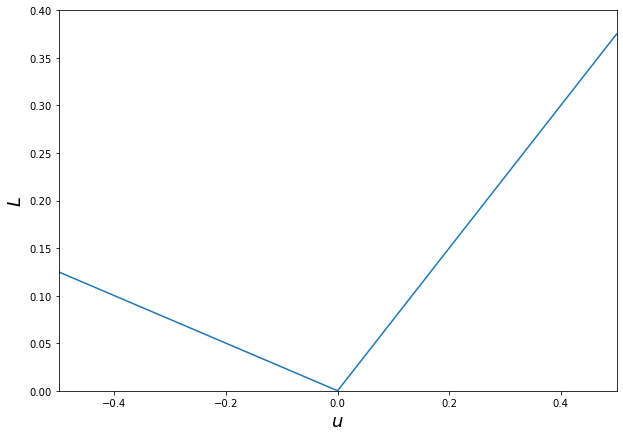

In [22]:
x = np.linspace(-0.5,0.5,10000)
#Parameters
tau = 0.75
#Create plot
fig, ax = plt.subplots(figsize = (10,7))
plt.plot(x, pinball_loss(x, tau = tau), label = r"$L_\tau$")
ax.set_xlim([-0.5,0.5])
ax.set_ylim([0,0.4])
ax.set_xlabel(r"$u$", fontsize = 18)
ax.set_ylabel(r"$L$", fontsize = 18)
#ax.set_title("Pinball Loss", fontsize = 20)
plt.savefig("pinball_loss.pdf",dpi=300,bbox_inches="tight")

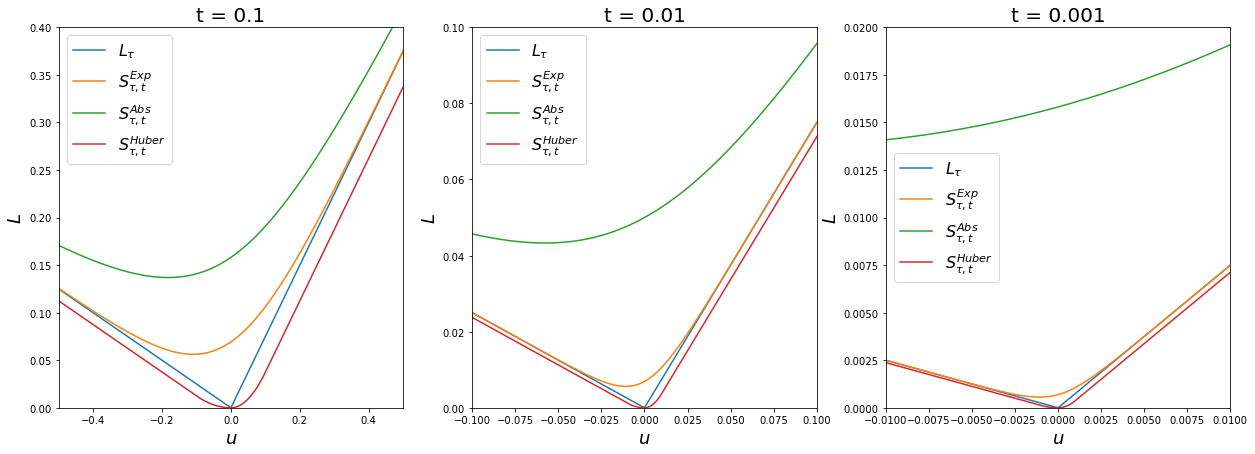

In [17]:
#Create linspace
x = np.linspace(-0.5,0.5,10000)
#Parameters
tau = 0.75
alpha = 0.1
#Create plot
fig, ax = plt.subplots(1,3,figsize = (21,7))
ax = ax.ravel()
#Plot losses
for cnt, alpha in enumerate([0.1,0.01,0.001]):
    ax[cnt].plot(x, pinball_loss(x, tau = tau), label = r"$L_\tau$")
    ax[cnt].plot(x, exp_smooth_pinball_loss(x, tau = tau, alpha = alpha), label = r"$S_{\tau,t}^{Exp}$")
    ax[cnt].plot(x, sqrt_smooth_pinball_loss(x, tau = tau, alpha = alpha), label = r"$S_{\tau,t}^{Abs}$")
    ax[cnt].plot(x, huber_pinball_loss(x, tau = tau, alpha = alpha), label = r"$S_{\tau,t}^{Huber}$")
    ax[cnt].legend(fontsize = 16)
    ax[cnt].set_xlabel(r"$u$", fontsize = 18)
    ax[cnt].set_ylabel(r"$L$", fontsize = 18)
    ax[cnt].set_title("t = {}".format(alpha), fontsize = 20)
#Set ax limits
ax[0].set_xlim([-0.5,0.5])
ax[0].set_ylim([0,0.4])
ax[1].set_xlim([-0.1,0.1])
ax[1].set_ylim([0,0.1])
ax[2].set_xlim([-0.01,0.01])
ax[2].set_ylim([0,0.02])
plt.savefig("smooth_loss_comparison.pdf",dpi = 300, bbox_inches = "tight")